In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

b) Set to be the y variable in the dataframe from a and X to be the remaining features.

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

In [9]:

import matplotlib.pyplot as plt
import numpy as np
plt.subplot(2, 1, 1)

# Fill these in
alphas = []
train_errors=[]
test_errors=[]
alpha_optim=0



plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()


"\nimport matplotlib.pyplot as plt\nimport numpy as np\nplt.subplot(2, 1, 1)\nalphas = []\ntrain_errors=[]\ntest_errors=[]\nalpha_optim=0\nplt.semilogx(alphas, train_errors, label='Train')\nplt.semilogx(alphas, test_errors, label='Test')\nplt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',\n           linewidth=3, label='Optimum on test')\nplt.legend(loc='lower left')\nplt.ylim([0, 1.2])\nplt.xlabel('Regularization parameter')\nplt.ylabel('Performance')\n\n# Show estimated coef_ vs true coef\nplt.subplot(2, 1, 2)\nplt.plot(coef, label='True coef')\nplt.plot(coef_, label='Estimated coef')\nplt.legend()\nplt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)\n#plt.show()\n"

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

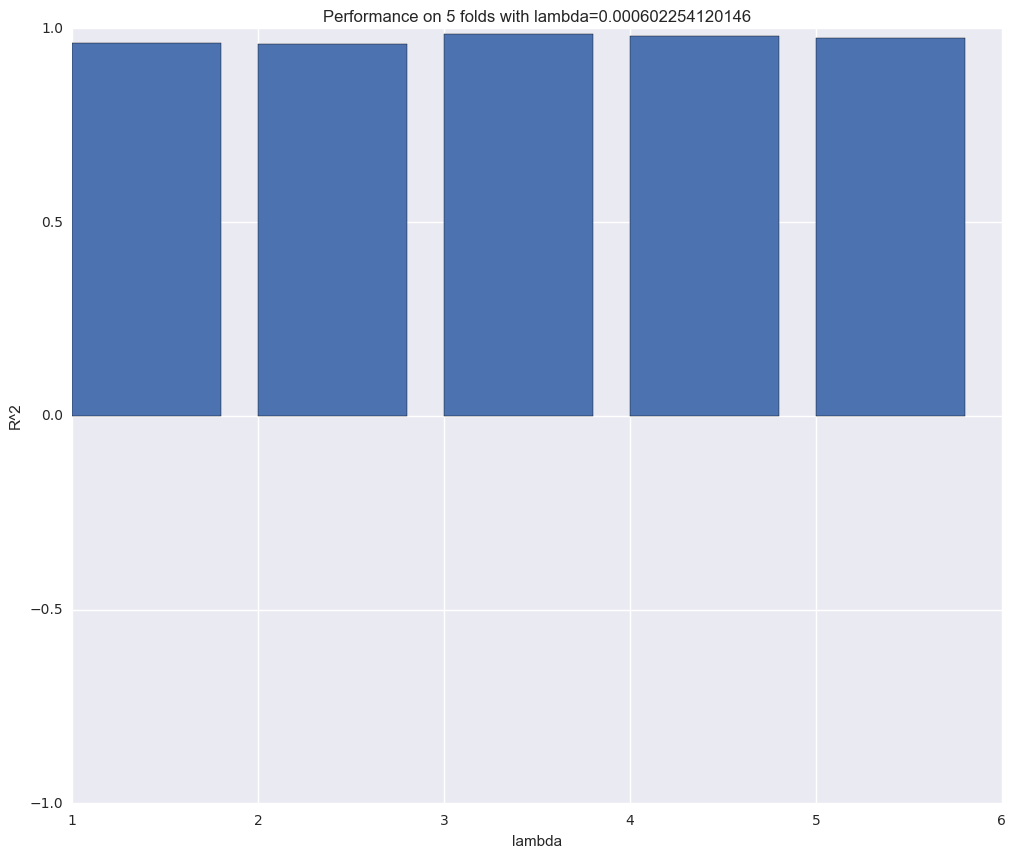

In [446]:
from sklearn.model_selection import cross_val_score

regr = Lasso(alpha=alpha_best)
scores = cross_val_score(regr, X, y, cv=5)
plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alpha))
plt.bar(range(1,6),scores)
plt.show()

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [478]:
from sklearn.cross_validation import KFold
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X2,np.array(y),Lasso,alpha=alpha_best)

In [473]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

In [479]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))